In [1]:
from src.tools import check_file_path
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable
from PIL import Image
import numpy as np
exps = "datasets/dataset-2024-04-25_14-58-19/valid"

filename = '1712269457.047345'

rgb=check_file_path(exps,'rgb',filename+".jpg")
depth=check_file_path(exps,'depth',filename+".png")
projected=check_file_path(exps,'projected',filename+".npy")
mask=check_file_path(exps,'mask',filename+".npy")
confidence=check_file_path(exps,'confidence',filename+".npy")
import matplotlib.pyplot as plt

fig,axs = plt.subplots(1,5,figsize=(20,5))
axs[0].imshow(Image.open(rgb))
axs[0].set_title("RGB")
axs[0].axis('off')
axs[1].imshow(np.array(Image.open(depth))/1000,cmap='nipy_spectral',vmin=0,vmax=10)
axs[1].set_title("Depth")
axs[1].axis('off')
im0 = axs[2].imshow(np.load(projected),cmap='nipy_spectral',vmin=0, vmax=8)
axs[2].set_title("Projected")
axs[2].axis('off')
divider = make_axes_locatable(axs[2])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')
im0 = axs[3].imshow(np.load(mask),cmap='nipy_spectral',vmin=0, vmax=8)
axs[3].set_title("Mask")
axs[3].axis('off')
divider = make_axes_locatable(axs[3])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')
im0 = axs[4].imshow(np.load(confidence),cmap='nipy_spectral',vmin=0, vmax=1)
axs[4].set_title("Confidence")
axs[4].axis('off')
divider = make_axes_locatable(axs[4])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

FileNotFoundError: File path 'datasets/dataset-2024-04-25_14-58-19/valid\projected\1712269457.047345.npy' does not exist.

C:\Users\Gharib\AppData\Local\Temp\ipykernel_22748\1990469657.py:30: RuntimeWarning: invalid value encountered in scalar divide
  pourcentage_labeled_missclassified_current = np.sum(labeled_error > 4)/np.sum(old_mask != 0)


nan found
nan found
labeled error [0.         0.         0.         ... 0.33488083 0.40048754 0.40048754]


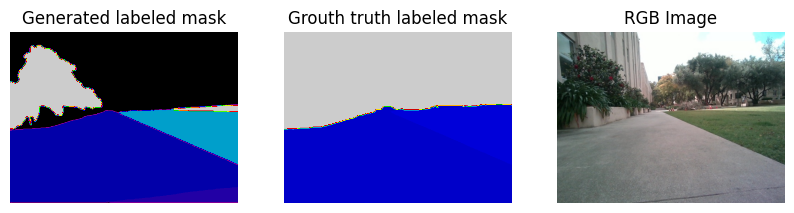

labeled error [0.        0.        0.        ... 6.4862604 6.4862604 6.4862604]


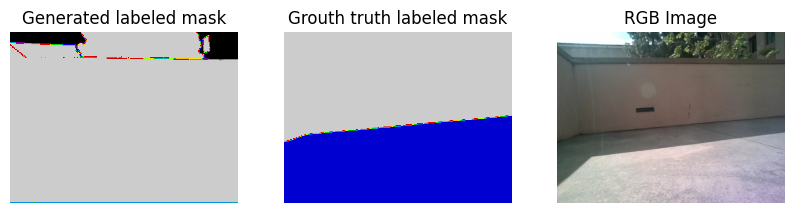

labeled error [0.       0.       0.       ... 6.398373 6.398373 6.398373]


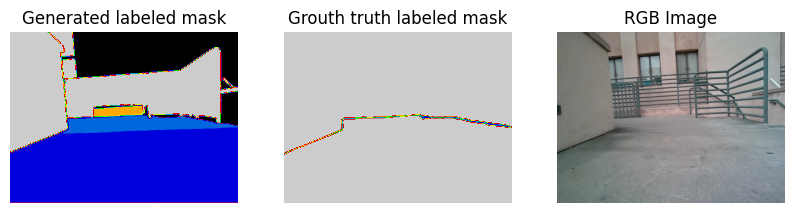

labeled error [0.        0.        0.        ... 0.1757766 0.1757766 0.1757766]


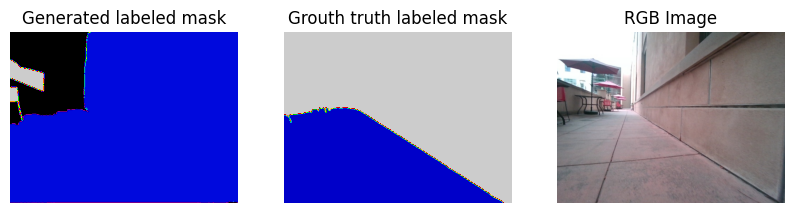

labeled error [0.         0.         0.         ... 0.22133005 0.22133005 0.22133005]


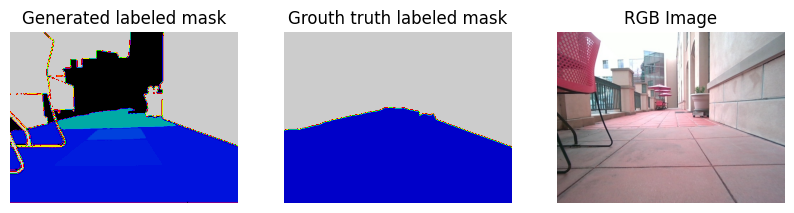

labeled error [0.19303215 0.19303215 0.19303215 ... 0.30610263 0.30610263 0.30610263]


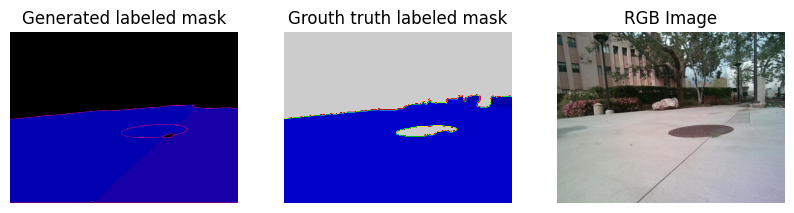

In [29]:
from src.data_labeller.dataset_analyser import DatasetAnalyser
from src.tools import check_file_path
import numpy as np
import matplotlib.pyplot as plt
dataset_path= "datasets/dataset-2024-04-25_14-58-19"
dataset = DatasetAnalyser(dataset_path)

pourcentage_unlabeled_traversable=[]
pourcentage_labeled_missclassified=[]
for data in dataset('valid_manually_labelled'):
    try:
        old_mask = np.load(check_file_path(dataset_path,'valid','mask',data['timestamp']+'.npy')) 
    except:
        print("no mask found for ",data['timestamp'])
        continue
    unlabeled_old_mask = old_mask == 0

    mask=data['mask']
    traversable_true_mask  = np.logical_and(mask < 8,mask > 0)
    # print(np.sum(traversable_true_mask))
    # calculate the intersection of the two masks
    unlabeled_traversable = np.logical_and(unlabeled_old_mask, traversable_true_mask)
    unlabeled_traversable = np.sum(unlabeled_traversable)/np.sum(unlabeled_old_mask)

    # labeled_old_mask_trav = np.logical_and(old_mask > 0,old_mask < 8)
    # labeled_not_traversable = np.logical_and(labeled_old_mask_trav, np.logical_not(traversable_true_mask))
    # labeled_not_traversable = np.sum(labeled_not_traversable)/np.sum(labeled_old_mask_trav)
    old_mask_corrected = old_mask[old_mask>8] = 8
    labeled_error = np.sqrt(((old_mask[old_mask != 0] - mask[old_mask != 0])**2))
    pourcentage_labeled_missclassified_current = np.sum(labeled_error > 4)/np.sum(old_mask != 0)
    # print("unlabeled_traversable",unlabeled_traversable)
    # print("labeled_not_traversable",labeled_not_traversable)
    if np.isnan(unlabeled_traversable) or np.isnan(pourcentage_labeled_missclassified_current):
        print("nan found")
        continue
    # if labeled_not_traversable > 0.5:
    #     fig,axs = plt.subplots(1,3)
    #     axs[0].imshow(old_mask,vmin=0,vmax=8,cmap='nipy_spectral')
    #     axs[1].imshow(mask,vmin=0,vmax=8,cmap='nipy_spectral')
    #     axs[2].imshow(data['rgb'])
    #     plt.show()
    if pourcentage_labeled_missclassified_current > 0.01:
        print("labeled error",labeled_error)
        fig,axs = plt.subplots(1,3,figsize=(10,5))
        axs[0].imshow(old_mask,vmin=0,vmax=8,cmap='nipy_spectral')
        axs[0].axis('off')
        axs[0].set_title("Generated labeled mask")
        axs[1].imshow(mask,vmin=0,vmax=8,cmap='nipy_spectral')
        axs[1].axis('off')
        axs[1].set_title("Grouth truth labeled mask")
        axs[2].imshow(data['rgb'])
        axs[2].axis('off')
        axs[2].set_title("RGB Image")
        plt.show()
    pourcentage_labeled_missclassified.append(pourcentage_labeled_missclassified_current*100)
    pourcentage_unlabeled_traversable.append(unlabeled_traversable*100)



124
124
unlabeled_traversable mean: 7.487222540229928
labeled_not_traversable mean: 1.3878042211111739


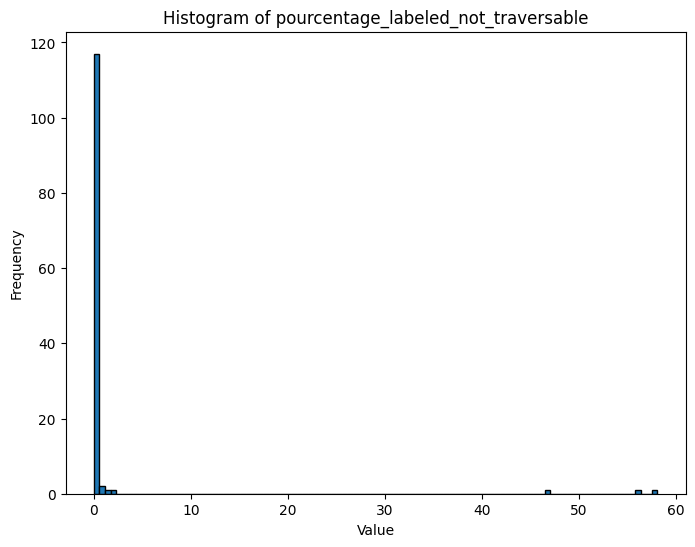

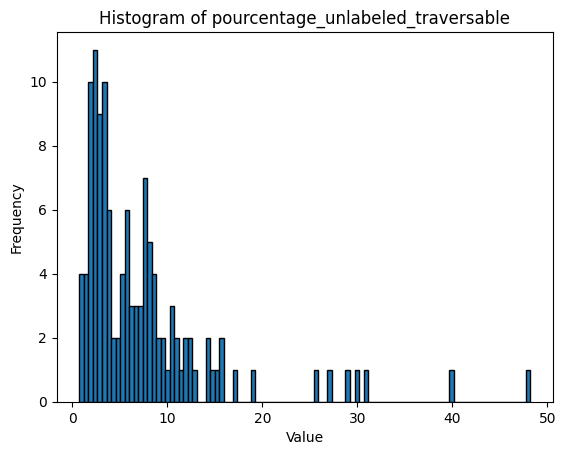

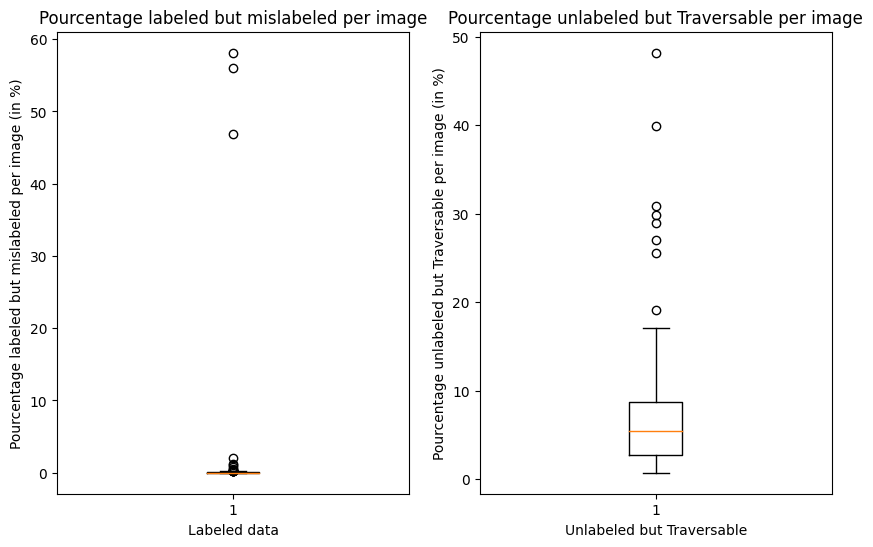

In [32]:
print(pourcentage_labeled_missclassified.__len__())
print(pourcentage_unlabeled_traversable.__len__())

import matplotlib.pyplot as plt

# Calculate the mean
print('unlabeled_traversable mean:', np.mean(pourcentage_unlabeled_traversable))
print('labeled_not_traversable mean:', np.mean(pourcentage_labeled_missclassified))

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(pourcentage_labeled_missclassified, bins=100, edgecolor='black')
plt.title('Histogram of pourcentage_labeled_not_traversable')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

plt.hist(pourcentage_unlabeled_traversable, bins=100,edgecolor='black')
plt.title('Histogram of pourcentage_unlabeled_traversable')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))

# Plot the first subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.boxplot(pourcentage_labeled_missclassified)
plt.title('Pourcentage labeled but mislabeled per image')
plt.ylabel('Pourcentage labeled but mislabeled per image (in %)')
plt.xlabel('Labeled data')  # X label for the first subplot

# Plot the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.boxplot(pourcentage_unlabeled_traversable)
plt.title('Pourcentage unlabeled but Traversable per image')
plt.ylabel('Pourcentage unlabeled but Traversable per image (in %)')
plt.xlabel('Unlabeled but Traversable')  # X label for the second subplot

# Display the plots
plt.show()
